In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [5]:
from src.vols.constant_vol import *
from src.gans.ivgan import IVGan
from src.networks.ffn import FFNetwork
from src.utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
set_plot_params()

In [82]:
N_paths = 10016
total_timesteps = 60*60*7.5 #1 second data
n_timesteps = 60 #train at 1 min interval

vol_model = ConstantVol(sigma=0.2)
spots, vols = vol_model.generate(N_paths, total_timesteps, n_timesteps, reshape_for_rnn=True)

First train a model using a method of moments. We try to match the first $k$ moments of the distribution generated by 
$$
Z_F = \frac{X_1 - X_0}{\sqrt{F(X_0,X_{1/n},X_{2/n},\ldots,X_{(n-1)/n},X_1)}}
$$
to those of the standard normal. We set $k=4$ and train using the $L1$ norm. We use a simple feedforward neural network, and train for 10 epochs.

In [83]:
generator = FFNetwork(n_layers=2, h_dims=32, loss=None, lr=0.00001)
discriminator = FFNetwork(n_layers=2, h_dims=32, loss=None, lr=0.0002)

In [84]:
gan = IVGan(discriminator, generator)

In [ ]:
result = gan.train(x_train=spots.squeeze(-1),
        true_sample=np.random.normal(size=(N_paths, 1)),
        num_epochs=20,
        batch_size=32,
        clip=True,
        num_critic=10,
)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




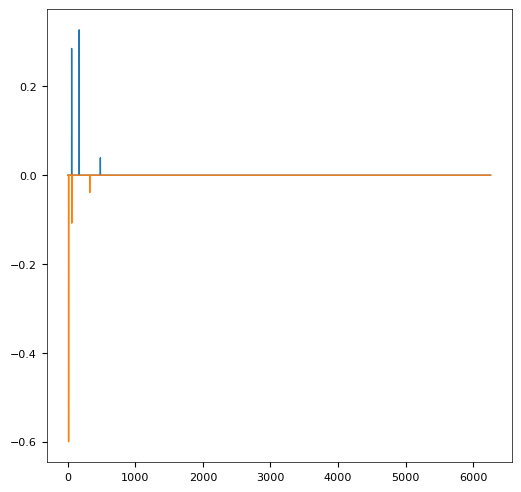

In [77]:
plt.plot(result['critic_loss'])
plt.plot(result['generator_loss'])

In [78]:
spots, vols = vol_model.generate(10000, total_timesteps, n_timesteps)
iv = generator.predict_iv(spots)
true_iv = np.sum(vols**2/total_timesteps, axis=1)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [79]:
iv

array([0.59142205, 0.59001807, 0.5911122 , ..., 0.59012334, 0.58837754,
       0.59131929])

In [80]:
true_iv

array([8.888888e-05, 8.888888e-05, 8.888888e-05, ..., 8.888888e-05,
       8.888888e-05, 8.888888e-05], dtype=float32)

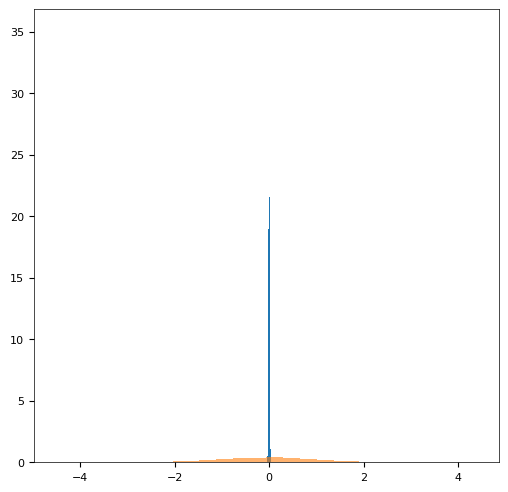

In [81]:
plt.hist((spots[:,-1] - spots[:,0])/np.sqrt(iv), bins=50, density=True)
#plt.hist((spots[:,-1] - spots[:,0])/np.sqrt(np.squeeze(true_iv)), bins=50, density=True)

plt.hist(np.random.normal(size=100000), bins=50, alpha=0.6, density=True)
plt.show()

In [188]:
z = (spots[:,-1,0] - spots[:,0,0])/np.sqrt(np.squeeze(true_ivs))

In [190]:
RBFMMDLoss()(spots[:,-1,0] - spots[:,0,0], np.squeeze(true_ivs))

<tf.Tensor: shape=(), dtype=float64, numpy=0.0003705099211863683>

In [191]:
RBFMMDLoss()(spots[:,-1,0] - spots[:,0,0], iv)

<tf.Tensor: shape=(), dtype=float64, numpy=-1.6726540690958913e-05>

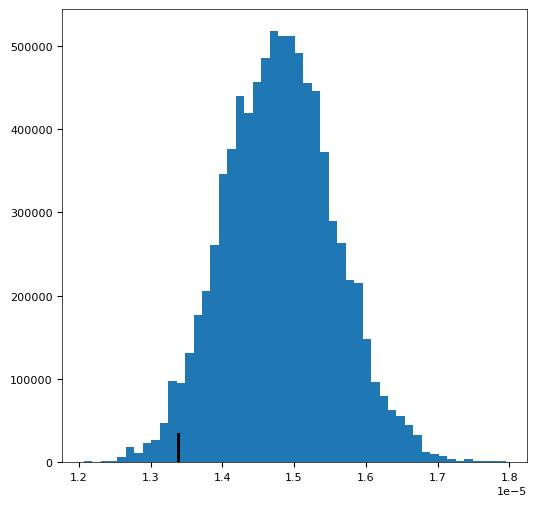

In [171]:
plt.hist(true_ivs, bins=50, density=True)
plt.vlines(iv, ymin=0, ymax=35000.0)
plt.show()

In [181]:
np.mean(true_ivs)

1.4802211489946724e-05